In [41]:
import seaborn as sns
import rho_plus as rp
from pathlib import Path
from baysic.utils import quick_view, json_to_df
import pandas as pd
IS_DARK = False
theme, cs = rp.mpl_setup(IS_DARK)
rp.plotly_setup(IS_DARK)

df = []

run_dir = Path('logs/10-12/Ce1B1Rh3/1')
for group in range(231):
    path = run_dir / f'{group}.json'
    if path.exists():
        df.append(json_to_df(path))


df = pd.concat(df).reset_index()
print(df.shape)
df.head()

(970, 19)


,index,struct,e_form,lat_matrix,gen_attempt,num_assignments,volume_ratio,volume,wyckoff_letters,total_dof,group_num,num_total_coords,num_filtered_coords,num_outputs,num_distance_checks,group_number,group_symbol,lattice_type,num_attempts
0,0,"[[0. 0. 1.92778218] Ce, [0. ...",-6.674028,"[[5.517950058, -0.0748137385, -0.0235291142], ...",17,1456,1.202588,89.021904,b_c_i_d,3,2,"[1, 1, 1, 41]","[1, 1, 1, 41]",41,6777,2,P-1,triclinic,184
1,1,"[[0. 0. 1.92778218] Ce, [0. ...",-6.910285,"[[5.517950058, -0.0748137385, -0.0235291142], ...",17,1456,1.202588,89.021904,b_c_i_d,3,2,"[1, 1, 1, 41]","[1, 1, 1, 41]",41,6777,2,P-1,triclinic,184
2,2,"[[0. 0. 1.92778218] Ce, [0. ...",-6.885287,"[[5.517950058, -0.0748137385, -0.0235291142], ...",17,1456,1.202588,89.021904,b_c_i_d,3,2,"[1, 1, 1, 41]","[1, 1, 1, 41]",41,6777,2,P-1,triclinic,184
3,3,"[[ 3.4124887 -0.24223337 0.60988706] Ce, [0....",-7.213593,"[[6.8249773979, -0.4844667315, 1.219774127], [...",31,1456,1.118391,82.789169,d_g_i_a,3,2,"[1, 1, 1, 16]","[1, 1, 1, 16]",16,6507,2,P-1,triclinic,184
4,4,"[[0. 0. 0.] Ce, [ 0. 2.32693386 -1.15...",-4.504768,"[[6.8984837532, 1.92654562, 1.2812957764], [0....",44,1456,2.699344,199.819641,a_c_i_g,3,2,"[1, 1, 1, 863]","[1, 1, 1, 500]",500,8016,2,P-1,triclinic,184


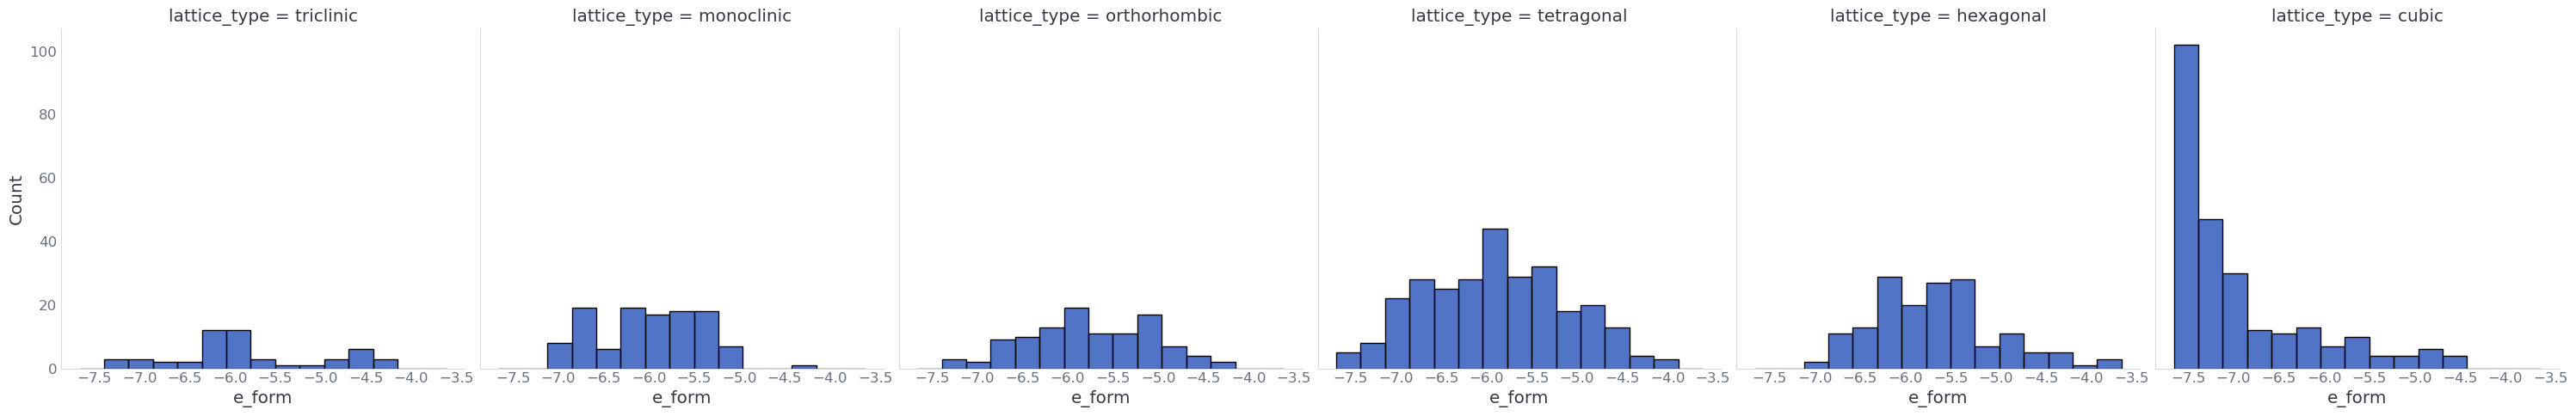

In [45]:
sns.displot(df.query('e_form < 0'), x='e_form', col='lattice_type')

In [38]:
grouped = df.groupby(['group_number', 'gen_attempt']).first()
grouped

index  \
group_number gen_attempt          
2            7                0   
             10               5   
             11              15   
             15              17   
             16              22   
...                         ...   
229          82              45   
             83              46   
             84              47   
             85              48   
             87              49   

                                                                     struct  \
group_number gen_attempt                                                      
2            7            [[0.         2.05266333 2.08722979] Mg, [3.426...   
             10           [[ 2.86924958 -0.44356823 -0.25038907] Mg, [0....   
             11           [[3.38916206 0.77161455 2.63155571] Mg, [0. 0....   
             15           [[0.         2.3940556  2.80653427] Mg, [2.957...   
             16           [[2.40990901 3.2323045  2.23606206] Mg, [ 0.  ...   
...                                                                     ...   
229          82           [[0.         2.55293655 2.55293655] Mg, [2.552...   
             83           [[0.        2.9664166 2.9664166] Mg, [2.966416...   
             84           [[0.         2.37629271 2.37629271] Mg, [2.376...   
             85           [[0.        2.8307066 2.8307066] Mg, [2.830706...   
             87           [[0.         2.53067565 2.53067565] Mg, [2.530...   

                            e_form  \
group_number gen_attempt             
2            7           -1.618665   
             10          -2.119147   
             11          -1.676046   
             15          -1.390469   
             16          -1.067327   
...                            ...   
229          82          -1.812872   
             83          -2.031391   
             84          -1.145066   
             85          -2.130926   
             87          -1.737642   

                                                                 lat_matrix  \
group_number gen_attempt                                                      
2            7            [[6.8526139259, 0.2487724274, 0.2125957757], [...   
             10           [[5.7384991646, -0.8871364594, -0.5007781386],...   
             11           [[6.7783241272, 1.5432291031, 0.8839777112], [...   
             15           [[5.9147472382, 0.3315677941, -0.2785941064], ...   
             16           [[4.8198180199, 0.3297427595, -0.0680563897], ...   
...                                                                     ...   
229          82           [[5.1058731079, 0.0, 0.0], [0.0, 5.1058731079,...   
             83           [[5.9328331947, 0.0, 0.0], [0.0, 5.9328331947,...   
             84           [[4.7525854111, 0.0, 0.0], [0.0, 4.7525854111,...   
             85           [[5.6614131927, 0.0, 0.0], [0.0, 5.6614131927,...   
             87           [[5.0613512993, 0.0, 0.0], [0.0, 5.0613512993,...   

                          num_assignments  volume_ratio      volume  \
group_number gen_attempt                                              
2            7                       1023      1.650129  151.029831   
             10                      1023      1.589620  145.491684   
             11                      1023      1.456478  133.305710   
             15                      1023      1.729893  158.330292   
             16                      1023      1.522543  139.352356   
...                                   ...           ...         ...   
229          82                         1      1.454338  133.109802   
             83                         1      2.281611  208.826904   
             84                         1      1.172857  107.346962   
             85                         1      1.982576  181.457352   
             87                         1      1.416624  129.658051   

                         wyckoff_letters  total_dof  group_num  \
group_number gen_attempt     

In [134]:
grouped.sort_values('num_distance_checks', ascending=False)[['group_symbol', 'wyckoff_letters', 'num_total_coords', 'num_distance_checks', 'lattice_type']]

group_symbol  ... lattice_type
group_number gen_attempt               ...             
2            161                  P-1  ...    triclinic
             72                   P-1  ...    triclinic
             170                  P-1  ...    triclinic
             3                    P-1  ...    triclinic
             5                    P-1  ...    triclinic
...                               ...  ...          ...
223          9                  Pm-3n  ...        cubic
             89                 Pm-3n  ...        cubic
             13                 Pm-3n  ...        cubic
             16                 Pm-3n  ...        cubic
194          165              P63/mmc  ...    hexagonal

[152 rows x 5 columns]

In [126]:
grouped.sort_values('num_assignments', ascending=False).groupby('group_number').first()

,index,struct,e_form,lat_matrix,num_assignments,volume_ratio,volume,wyckoff_letters,total_dof,group_num,num_total_coords,num_filtered_coords,num_outputs,num_distance_checks,group_symbol,lattice_type,num_attempts
group_number,,,,,,,,,,,,,,,,,
2,14,"[[0. 2.89137793 4.01958108] Mg, [0. ...",-1.913141,"[[5.6742997169, 0.825042963, 0.1320042759], [0...",1023,2.447942,224.050537,i_i_g_c_i,9,2,"[1, 1, 1009, 289291, 145371]","[1, 1, 500, 500, 500]",500,1534211,P-1,triclinic,64
3,0,"[[0.28556632 0.89190156 2.55215236] Mg, [-0.28...",-1.790858,"[[5.3234634399, 0.0, 0.0], [0.0, 5.9823966026,...",1430,1.870024,171.155975,e_e_c_a_e,11,3,"[622, 181092, 24499, 87, 10]","[622, 500, 500, 87, 10]",10,738923,P2,monoclinic,249
4,0,"[[3.95044965 2.81418342 0.22911496] Mg, [-3.95...",-1.113575,"[[4.1192040443, 0.0, 0.0], [0.0, 5.0057806969,...",1,1.194981,109.371948,a_a_a_a,12,4,"[1728, 896743, 3636, 3809]","[1728, 500, 500, 500]",500,4720896,P21,monoclinic,17
5,38,"[[2.03919824 0.91726471 1.18114847] Mg, [-2.03...",-1.609917,"[[4.2589731216, 0.0, 0.0], [0.0, 4.3443818092,...",12,1.347131,123.297600,c_b_a,5,5,"[939, 4987, 86]","[939, 500, 86]",86,19020,C2,monoclinic,21
6,0,"[[2.90637446 1.27717052 0.40138528] Mg, [ 2.90...",-1.629130,"[[4.7662796974, 0.0, 0.0], [0.0, 5.3429870605,...",64,1.532329,140.248077,c_c_b_a_c,13,6,"[289, 35783, 7978, 78, 55]","[289, 500, 500, 78, 55]",55,262494,Pm,monoclinic,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,6,"[[2.74301982 0. 0. ] Mg, [0. ...",-2.144600,"[[5.4860396385, 0.0, 0.0], [0.0, 5.4860396385,...",3,1.803982,165.111328,d_c_b_a,0,221,"[1, 1, 1, 1]","[1, 1, 1, 1]",1,5,Pm-3m,cubic,249
222,11,"[[3.7026583 1.23421943 1.23421943] Mg, [1.234...",-1.503997,"[[4.9368777275, 0.0, 0.0], [0.0, 4.9368777275,...",1,1.314656,120.325333,b_a,0,222,"[1, 1]","[1, 1]",1,3,Pn-3n,cubic,81
223,40,"[[0. 2.38256025 2.38256025] Mg, [2.382...",-1.169836,"[[4.7651205063, 0.0, 0.0], [0.0, 4.7651205063,...",3,1.182162,108.198593,b_a,0,223,"[1, 1]","[1, 1]",1,3,Pm-3n,cubic,95


In [106]:
grouped.sort_values('num_assignments', ascending=False).groupby('lattice_type').first()

,index,struct,e_form,lat_matrix,num_assignments,volume_ratio,volume,wyckoff_letters,total_dof,group_num,num_total_coords,num_filtered_coords,num_outputs,num_distance_checks,group_symbol,num_attempts
lattice_type,,,,,,,,,,,,,,,,
cubic,28,"[[2.41467142 2.41467142 2.41467142] Au, [0. 0....",-1.821746,"[[4.8293428421, 0.0, 0.0], [0.0, 4.8293428421,...",5,1.230607,112.632591,h_b_a,1,195,"[1, 1, 1]","[1, 1, 1]",1,14,P23,117
hexagonal,45,"[[ 2.43156822 -1.40386649 4.01638508] Au, [2....",-0.981545,"[[2.4315681458, -4.21159935, 0.0], [2.43156814...",1953,1.797563,164.523865,l_f_d,3,174,"[1, 1, 93]","[1, 1, 93]",93,1847,P-6,232
monoclinic,45,"[[0.11119776 3.4607904 2.23738718] Au, [0.111...",-0.859820,"[[4.4493374825, 0.0, 0.0], [0.0, 6.9215807915,...",20280,1.505661,137.807175,o_m_f_c,5,10,"[1, 1, 77, 22]","[1, 1, 77, 22]",22,5126,P2/m,121
orthorhombic,40,"[[1.0428192 3.30572451 0.8204733 ] Mg, [-1.04...",-0.774280,"[[5.98787117, 0.0, 0.0], [0.0, 8.2330713272, 0...",15040,1.825216,167.054810,u_p_i,5,16,"[353, 372, 811]","[353, 372, 500]",500,5358,P222,171
tetragonal,39,"[[2.91647458 2.91647458 2.70961046] Mg, [2.916...",-0.832846,"[[5.8329491615, 0.0, 0.0], [0.0, 5.8329491615,...",804,2.014506,184.379761,l_d_c_g,2,89,"[1, 1, 1, 1]","[1, 1, 1, 1]",1,29,P422,152
triclinic,14,"[[0. 2.89137793 4.01958108] Mg, [0. ...",-1.913141,"[[5.6742997169, 0.825042963, 0.1320042759], [0...",1023,2.447942,224.050537,i_i_g_c_i,9,2,"[1, 1, 1009, 289291, 145371]","[1, 1, 500, 500, 500]",500,1534211,P-1,64


In [105]:
grouped.query('group_symbol == "P222"')

index  ... num_attempts
group_number gen_attempt         ...             
16           19               0  ...          171
             21              10  ...          171
             63              20  ...          171
             155             30  ...          171
             170             40  ...          171

[5 rows x 17 columns]

In [26]:
import torch

def _pairwise_dist_ratio(c1: torch.Tensor, c2: torch.Tensor, rads1: torch.Tensor, rads2: torch.Tensor, lattice: torch.Tensor) -> torch.Tensor:
    """Gets pairwise distances (as a ratio of the radii sum) using the given lattice.

    c1: [B, 3]
    c2: [C, D, 3]
    rads1: broadcastable to [B]
    rads2: broadcastable to [D]
    lattice: [3, 3]

    returns: [C]
    """
    set_diffs = c1.unsqueeze(-2).unsqueeze(-2) - c2.unsqueeze(0)
    set_diffs = torch.minimum(set_diffs % 1, -set_diffs % 1)
    set_diffs = torch.matmul(set_diffs, lattice.T)
    set_diffs **= 2
    # [B, C, D, 3]
    # sum over last axis
    # then take min over B and D
    diffs = torch.sum(set_diffs, dim=-1)
    diffs.sqrt_()
    rads = rads1.reshape(-1, 1, 1) + rads2.reshape(1, 1, -1)
    return (diffs / rads).min(dim=-1)[0].min(dim=0)[0]

pairwise_dist_ratio = torch.vmap(_pairwise_dist_ratio, (0, None, None, None, None), chunk_size=256)

c1 = torch.randn(1728, 4, 3).float()
c2 = torch.randn(500, 4, 3).float()
r1 = torch.randn(4).abs()
r2 = torch.randn(1).abs()
lattice = torch.randn(3, 3)

pairwise_dist_ratio(c1, c2, r1, r2, lattice).shape

torch.Size([1728, 500])

In [36]:
def _pairwise_diag_dist_ratio(c1: torch.Tensor, radius: torch.Tensor, lattice: torch.Tensor) -> torch.Tensor:
    """Gets pairwise one-vs-rest (as a ratio of the radii sum) using the given lattice.

    c1: [B, 3]
    radius: [1] or [B]
    lattice: [3, 3]

    Computes inner distance matrix [A, B - 1, 3]

    returns: [A]
    """
    set_diffs = c1[1:, :] - c1[[0], :]
    set_diffs = torch.minimum(set_diffs % 1, -set_diffs % 1)
    set_diffs = torch.matmul(set_diffs, lattice.T)
    set_diffs **= 2
    # [A, B - 1, 3]
    # sum over last axis
    # then take min over B and D
    diffs = torch.sum(set_diffs, dim=-1)
    diffs.sqrt_()    
    return (diffs / (2 * radius.unsqueeze(0))).min(dim=-1)[0]

pairwise_diag_dist_ratio = torch.vmap(_pairwise_diag_dist_ratio, (0, None, None), chunk_size=256)

pairwise_diag_dist_ratio(c1, r1[0], lattice).shape

torch.Size([1728])

In [13]:
print(r1.broadcast_to(c1.shape[:2]).unsqueeze(-1).unsqueeze(-1).shape)
print(r2.broadcast_to(c2.shape[:2]).unsqueeze(0).unsqueeze(0).shape)

torch.Size([1728, 4, 1, 1])
torch.Size([1, 1, 500, 4])


In [141]:

set_diffs = c1.unsqueeze(0).unsqueeze(0) - c2.unsqueeze(-2).unsqueeze(-2)
set_diffs %= 1
set_diffs[set_diffs > 0.5] *= -1
set_diffs %= 1
set_diffs = torch.matmul(set_diffs, lattice.T)
set_diffs.square_()
diffs = torch.sum(set_diffs, axis=-1)
diffs.sqrt_()
rads = r1.unsqueeze(0).unsqueeze(1) + r1.unsqueeze(-1).unsqueeze(-1)
diffs = diffs / rads

diffs.shape

torch.Size([1728, 4, 500, 4])

In [91]:
dists = pairwise_dist_ratio(c1, c2, torch.tensor(1), torch.tensor(1), torch.eye(3))
dists.shape

torch.Size([1728, 4, 500, 4])

In [94]:
dists.numel()

13824000

In [95]:
set_diffs = c1.unsqueeze(0).unsqueeze(0) - c2.unsqueeze(-2).unsqueeze(-2)
set_diffs.numel()

41472000

In [122]:
%%timeit
torch.minimum(set_diffs, 1 - set_diffs)

75.8 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [121]:
%%timeit
torch.fmin(set_diffs, 1 - set_diffs)

83.9 ms ± 818 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [100]:
%%timeit
torch.where(set_diffs < 0.5, set_diffs, 1 - set_diffs, out=set_diffs)

59 ms ± 896 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [108]:
%%timeit
pairwise_dist_ratio(c1, c2, torch.ones_like(c1[0, :, 0]), torch.ones_like(c2[0, :, 0]) * 3, torch.eye(3))

329 ms ± 6.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [128]:
from pyxtal import Group

sg = Group(16)
sg.list_wyckoff_combinations()

-- Spacegroup --# 16 (P222)--
4u	site symm: 1
2t	site symm: ..2
2s	site symm: ..2
2r	site symm: ..2
2q	site symm: ..2
2p	site symm: .2.
2o	site symm: .2.
2n	site symm: .2.
2m	site symm: .2.
2l	site symm: 2..
2k	site symm: 2..
2j	site symm: 2..
2i	site symm: 2..
1h	site symm: 222
1g	site symm: 222
1f	site symm: 222
1e	site symm: 222
1d	site symm: 222
1c	site symm: 222
1b	site symm: 222
1a	site symm: 222